# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfQuickSort = pd.read_csv("Results16/quickSort-PC16.csv")
dfQuickSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfMergeSort = pd.read_csv("Results16/mergeSort-PC16.csv")
dfMergeSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


#### Moving information from Test name to a seperate column 

In [29]:
#input type
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[0])

dfCounting["Input case"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[0])

dfQuickSort["Input case"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[0])

dfMergeSort["Input case"] = l

In [7]:
#input size
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[1])

dfCounting["Size"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[1])

dfQuickSort["Size"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[1])

dfMergeSort["Size"] = l


l = []
for i in range(len(dfReadCSV)):
    l.append(dfReadCSV.iloc[i]["Test name"].split("d")[-1])

dfReadCSV["Size"] = l

In [30]:


#removing values that are nonsense 
dfCounting = dfCounting[dfCounting['PKG (J)'] >= 0]
dfCounting = dfCounting[dfCounting['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
dfCounting = dfCounting[dfCounting['Time (ms)'] >= 0]

dfCounting = dfCounting.replace("  ", np.nan)

#missing values for each column
print("MISSING DATA: \n\n ", dfCounting.isnull().sum(axis=0))

dfCounting


MISSING DATA: 

  Test name          0
PKG (J)            0
CPU (J)            0
GPU (J)        20799
Memory (J)         0
Temperature        0
Time (ms)          0
Size               0
CPU - BG           0
Input case         0
dtype: int64


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Size,CPU - BG,Input case
0,random1-25000-1,5.558350,4.756775,NaN,0.380188,72,622.672,25000,-0.787305,random1
1,random1-25000-1,5.314636,4.515320,NaN,0.365112,72,627.655,25000,-1.028760,random1
2,random1-25000-1,5.447754,4.662659,NaN,0.370605,72,602.698,25000,-0.881421,random1
3,random1-25000-1,5.188416,4.428955,NaN,0.356323,72,596.155,25000,-1.115125,random1
4,random1-25000-1,5.204102,4.443542,NaN,0.355286,72,598.893,25000,-1.100537,random1
...,...,...,...,...,...,...,...,...,...,...
20794,worst-1000000-1,10.212769,8.609131,NaN,0.739380,60,1346.990,1000000,3.065051,worst
20795,worst-1000000-1,10.300110,8.668518,NaN,0.757263,60,1342.570,1000000,3.124438,worst
20796,worst-1000000-1,10.474915,8.800232,NaN,0.767151,61,1382.330,1000000,3.256152,worst
20797,worst-1000000-1,10.169312,8.535522,NaN,0.756592,60,1326.740,1000000,2.991443,worst


#### Subtract readCSV from data

In [59]:
bgAVG = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
for size in range(len(s)):
    bgAVG.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingRand{s[size]}"].mean())
bgAVG
l = []
for i in range(len(dfCounting)):
    for size in range(len(s)):
        if (int(dfCounting["Size"][i]) == s[size]):
            l.append(dfCounting["CPU (J)"][i] - bgAVG[size]["CPU (J)"])

dfCounting["CPU - BG"] = l


C:\Users\mathi\AppData\Local\Temp/ipykernel_23572/767288466.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bgAVG.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingRand{s[size]}"].mean())


In [ ]:
bgAVGbubbleRand = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGbubbleRand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())

for i in range(len(dfCounting)):
    for size in range(len(s)):
        if (int(dfCounting["Size"][i]) == s[size]):
            l.append(dfCounting["CPU (J)"][i] - bgAVG[size]["CPU (J)"])

dfBubbleSort["CPU - BG"] = l

## PLOTS

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU (J)'>

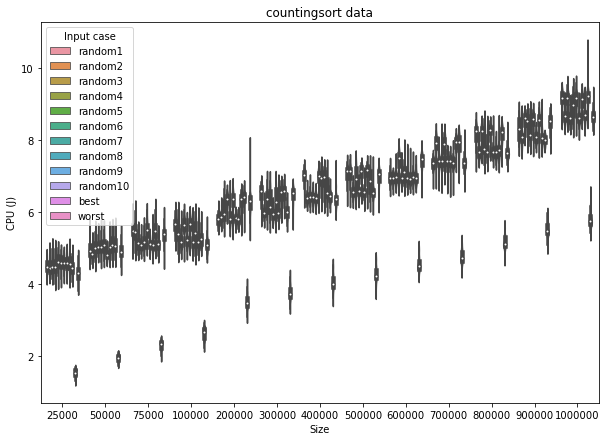

In [32]:
plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting, y = "CPU (J)", x = "Size", hue = "Input case")

C:\Users\mathi\AppData\Local\Temp/ipykernel_23572/4164392569.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.violinplot(data = dfCounting[dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"], y = "CPU - BG", x = "Size", hue = "Input case")


<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU - BG'>

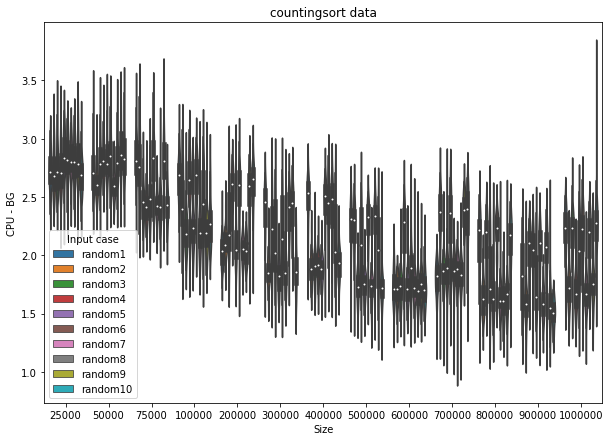

In [57]:
plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting[dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"], y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Quicksort data'}, xlabel='Size', ylabel='Time (ms)'>

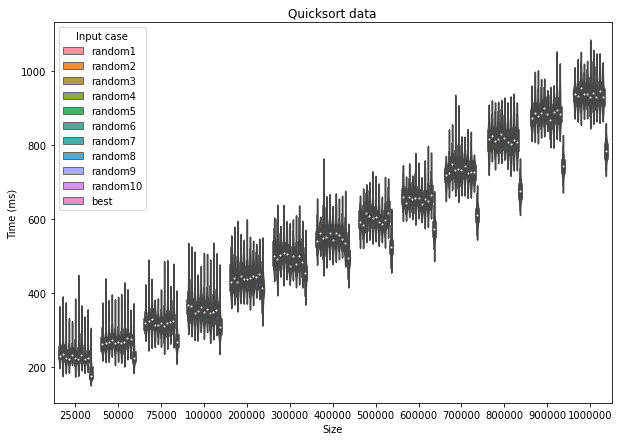

In [56]:
plt.figure(figsize=(10,7))
plt.title("Quicksort data")
sns.violinplot(data = dfQuickSort[dfQuickSort["Input case"] != "worst"], y = "Time (ms)", x = "Size", hue ="Input case")

C:\Users\mathi\AppData\Local\Temp/ipykernel_4292/1425789344.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.violinplot(data = dfBubbleSort[dfBubbleSort["Input case"]=="best"][dfBubbleSort["Size"] == "500000"], y = "Time (ms)", x = "Size", hue ="Input case")


<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

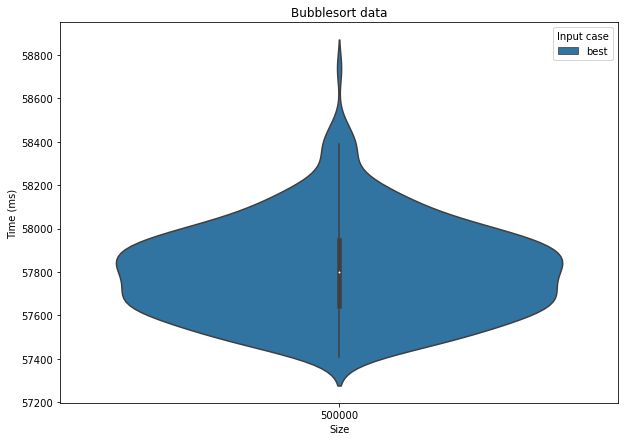

In [66]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort[dfBubbleSort["Input case"]=="best"][dfBubbleSort["Size"] == "500000"], y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

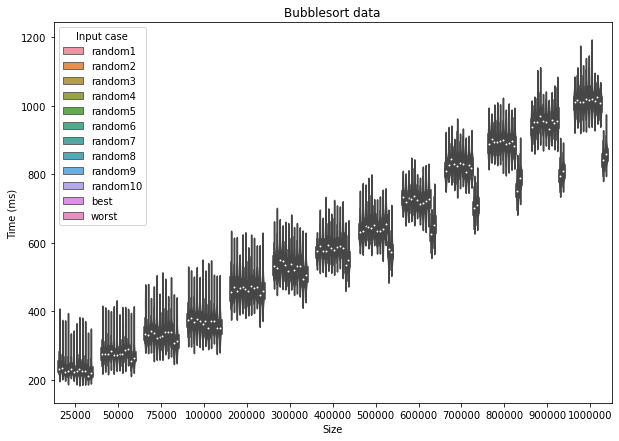

In [68]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfMergeSort, y = "Time (ms)", x = "Size", hue ="Input case")